<a href="https://colab.research.google.com/github/RahulRv07/Project-Work-phase-1/blob/main/Project_Work_Phase_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
file_path = "/content/diabetic_data.csv"

# Load dataset
df = pd.read_csv(file_path)


In [ ]:
# Show first 5 rows
print(df.head())


   encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Caucasian  Female   [0-10)      ?   
1        149190     55629189        Caucasian  Female  [10-20)      ?   
2         64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3        500364     82442376        Caucasian    Male  [30-40)      ?   
4         16680     42519267        Caucasian    Male  [40-50)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
0                 1  ...          No      No                   No

#Governance Layer

In [ ]:
def governance_layer():
    # Columns considered PII (must be removed for privacy)
    pii_columns = ["encounter_id", "patient_nbr"]

    # Columns required for modeling and privacy-preserving techniques
    required_columns = [
        'race','gender','age','admission_type_id','discharge_disposition_id',
        'admission_source_id','time_in_hospital','num_lab_procedures','num_procedures',
        'num_medications','number_outpatient','number_emergency','number_inpatient',
        'diag_1','diag_2','diag_3','number_diagnoses','max_glu_serum','A1Cresult',
        'insulin','change','diabetesMed','readmitted'
    ]

    # Columns not required (can be dropped safely, dataset-specific extras)
    removable_columns = [
        "weight", "payer_code", "medical_specialty"
    ]

    # Build governance rulebook
    governance_rules = {
        "PII": pii_columns,
        "Required": required_columns,
        "Removable": removable_columns
    }

    return governance_rules


# Example usage
rules = governance_layer()
print("Governance Rules (Policy Book):")
for key, value in rules.items():
    print(f"{key}: {value}")


Governance Rules (Policy Book):
PII: ['encounter_id', 'patient_nbr']
Required: ['race', 'gender', 'age', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'insulin', 'change', 'diabetesMed', 'readmitted']
Removable: ['weight', 'payer_code', 'medical_specialty']


#Data Management Layer

In [ ]:
# Step 1: Drop identifiers (PII + unnecessary columns)
import numpy as np

# Get the list of all columns in the dataframe
all_columns = df.columns.tolist()

# Columns considered PII (must be removed for privacy) and Removable
columns_to_drop = ["encounter_id", "patient_nbr", "weight", "payer_code", "medical_specialty"]

# Filter out columns to drop that are not present in the current dataframe
columns_to_drop_present = [col for col in columns_to_drop if col in all_columns]

# Drop the columns that are present
df = df.drop(columns=columns_to_drop_present)


# Step 2: Keep only required columns
required_columns = [
    'race','gender','age','admission_type_id','discharge_disposition_id',
    'admission_source_id','time_in_hospital','num_lab_procedures','num_procedures',
    'num_medications','number_outpatient','number_emergency','number_inpatient',
    'diag_1','diag_2','diag_3','number_diagnoses','max_glu_serum','A1Cresult',
    'insulin','change','diabetesMed','readmitted'
]
# Ensure that only the required columns that are present in the dataframe are kept
required_columns_present = [col for col in required_columns if col in df.columns]
df = df[required_columns_present]


# Step 3: Ensure consistency (drop rows with missing values)
# Replace "?" with NaN
df = df.replace("?", np.nan)

# Drop rows only if essential columns are missing
essential = ["race", "gender", "age", "readmitted"]
df = df.dropna(subset=essential)


# Step 4: Save cleaned dataset locally
cleaned_path = "/content/diabetic_datacleaned.csv"
df.to_csv(cleaned_path, index=False)

print("✅ Cleaned dataset saved at:", cleaned_path)
print("Shape:", df.shape)
print(df.head())

✅ Cleaned dataset saved at: /content/diabetic_datacleaned.csv
Shape: (99493, 23)
              race  gender      age  admission_type_id  \
0        Caucasian  Female   [0-10)                  6   
1        Caucasian  Female  [10-20)                  1   
2  AfricanAmerican  Female  [20-30)                  1   
3        Caucasian    Male  [30-40)                  1   
4        Caucasian    Male  [40-50)                  1   

   discharge_disposition_id  admission_source_id  time_in_hospital  \
0                        25                    1                 1   
1                         1                    7                 3   
2                         1                    7                 2   
3                         1                    7                 2   
4                         1                    7                 1   

   num_lab_procedures  num_procedures  num_medications  ...  diag_1  diag_2  \
0                  41               0                1  ...  250.83   

#Data Security Layer

In [ ]:
from cryptography.fernet import Fernet

# Generate encryption key
key = Fernet.generate_key()
cipher = Fernet(key)

# Convert cleaned dataset to bytes
data_bytes = df.to_csv(index=False).encode()

# Encrypt dataset
encrypted_data = cipher.encrypt(data_bytes)

# Save encrypted file
encrypted_path = "/content/diabetic_data_encrypted.txt"
with open(encrypted_path, "wb") as f:
    f.write(encrypted_data)

print("Dataset encrypted and saved!")
print("Encryption key (keep this safe to decrypt later):")
print(key.decode())

print("\nEncrypted file path:", encrypted_path)
print("Preview of encrypted data:")
print(encrypted_data[:500])

# To decrypt later:
# decrypted = cipher.decrypt(encrypted_data).decode()


Dataset encrypted and saved!
Encryption key (keep this safe to decrypt later):
Q6w79OxmwF_nQlK1xkMQlW-3SvhaWJpPdv-BApiFy44=

Encrypted file path: /content/diabetic_data_encrypted.txt
Preview of encrypted data:
b'gAAAAABo0rQ1-omHFKV3h-_-W9kqHt0sr0vdPDL7RLAMIxZRX4NwV4xfseicYpt1Pu6ZwZA5a9GY1MrLyFH2c1hDPbM4NUrxPYYcujvnG-q1SGktU3D3rUYtubSk_XXRJgKWgiGeXNeSVaKPvbeS61tBematPPYa1UwQD5Ux_9WqVT48tYqlJ6MrPL-FlMkYS0r7BcWflKjoXIDmrD1bbFXpuACVbTvuEZW37QDAyKkP-NFKP3TZsDXo_wosJl4rjdJLdITSHu4RePuMxwsG6R8Ba4zbPWqN-bTIRMaJ3po4ED1VLK8-zx_XZu6Hf2PbsQdNOA0mAz2EjGANR1r2RigQ8X1t9RId0VAK1lxtnVt6KivIdp_OvpJbpAJWADG83KYtJcHNb77tujzayukjkNExlDfdp3Io9AXcKcIVSoI6khd__3hI9lPu3zE4VS7_2P2BXDWt-BLORnVThLQxjJpvgSpKO-Ik-_zxPn6u1XrnxzPofYEf'


#Modeling Layer

De-Identification

In [ ]:
import pandas as pd

def apply_de_identification(df: pd.DataFrame) -> pd.DataFrame:
    # Step 1: Copy dataset
    df_deid = df.copy()

    # Step 2: Generalize 'age' into broader groups
    age_generalization = {
        '[0-10)': '0-20', '[10-20)': '0-20',
        '[20-30)': '20-40', '[30-40)': '20-40',
        '[40-50)': '40-60', '[50-60)': '40-60',
        '[60-70)': '60-80', '[70-80)': '60-80',
        '[80-90)': '80+', '[90-100)': '80+'
    }
    df_deid['age_group'] = df_deid['age'].replace(age_generalization)

    # Step 3: Generalize 'time_in_hospital'
    if 'time_in_hospital' in df_deid.columns:
        df_deid['stay_length'] = pd.cut(
            df_deid['time_in_hospital'],
            bins=[0, 3, 7, 14, 100],
            labels=['Short (0-3d)', 'Medium (4-7d)', 'Long (8-14d)', 'Very Long (>14d)'],
            right=True
        )

    # Step 4: Generalize 'num_medications'
    if 'num_medications' in df_deid.columns:
        df_deid['medication_group'] = pd.cut(
            df_deid['num_medications'],
            bins=[0, 5, 10, 20, 50, 100],
            labels=['Very Few (0-5)', 'Few (6-10)', 'Moderate (11-20)', 'Many (21-50)', 'Very Many (>50)'],
            right=True
        )

    # Step 5: Drop sensitive identifiers
    sensitive_cols = ['race', 'gender', 'age', 'diag_1', 'diag_2', 'diag_3']
    existing_to_drop = [c for c in sensitive_cols if c in df_deid.columns]
    df_deid = df_deid.drop(columns=existing_to_drop)

    print("✅ De-identification applied.")
    print("\nColumns removed:", existing_to_drop)
    print("Columns added: ['age_group', 'stay_length', 'medication_group']")
    print(f"Original shape: {df.shape}")
    print(f"New shape     : {df_deid.shape}")

    return df_deid

# Example run
df_deid = apply_de_identification(df)
print(df_deid[['age_group','stay_length','medication_group']].head())


✅ De-identification applied.

Columns removed: ['race', 'gender', 'age', 'diag_1', 'diag_2', 'diag_3']
Columns added: ['age_group', 'stay_length', 'medication_group']
Original shape: (99493, 23)
New shape     : (99493, 20)
  age_group   stay_length  medication_group
0      0-20  Short (0-3d)    Very Few (0-5)
1      0-20  Short (0-3d)  Moderate (11-20)
2     20-40  Short (0-3d)  Moderate (11-20)
3     20-40  Short (0-3d)  Moderate (11-20)
4     40-60  Short (0-3d)        Few (6-10)


Perturbative

In [ ]:
import numpy as np

def apply_perturbation(df: pd.DataFrame, noise_scale: float = 2.0) -> pd.DataFrame:
    df_perturb = df.copy()
    sensitive_cols = ['num_lab_procedures', 'num_medications', 'time_in_hospital']

    # Apply Gaussian noise
    for col in sensitive_cols:
        if col in df_perturb.columns:
            noise = np.random.normal(loc=0, scale=noise_scale, size=len(df_perturb))
            before_mean, before_std = df_perturb[col].mean(), df_perturb[col].std()

            df_perturb[col] = df_perturb[col] + noise
            df_perturb[col] = df_perturb[col].clip(lower=0)  # ensure no negatives

            after_mean, after_std = df_perturb[col].mean(), df_perturb[col].std()

            # Audit log for each column
            print(f"🎲 Perturbation applied to column: {col}")
            print(f"  Mean before: {before_mean:.2f} → after: {after_mean:.2f}")
            print(f"  Std before : {before_std:.2f} → after: {after_std:.2f}")

    return df_perturb
df_perturb = apply_perturbation(df)

🎲 Perturbation applied to column: num_lab_procedures
  Mean before: 43.07 → after: 43.09
  Std before : 19.70 → after: 19.77
🎲 Perturbation applied to column: num_medications
  Mean before: 16.03 → after: 16.03
  Std before : 8.12 → after: 8.36
🎲 Perturbation applied to column: time_in_hospital
  Mean before: 4.40 → after: 4.49
  Std before : 2.99 → after: 3.44


Non-Perturbative

In [ ]:
def apply_non_perturbative(df: pd.DataFrame) -> pd.DataFrame:

    df_nonperturb = df.copy()
    changes = {}

    # Group hospital stay duration
    if 'time_in_hospital' in df_nonperturb.columns:
        df_nonperturb['time_in_hospital_cat'] = pd.cut(
            df_nonperturb['time_in_hospital'],
            bins=[0, 3, 7, 14],
            labels=['short', 'medium', 'long']
        )
        changes['time_in_hospital'] = 'Grouped into categories [short, medium, long]'

    # Group medication usage
    if 'num_medications' in df_nonperturb.columns:
        df_nonperturb['num_medications_cat'] = pd.cut(
            df_nonperturb['num_medications'],
            bins=[0, 10, 20, 50],
            labels=['low', 'medium', 'high']
        )
        changes['num_medications'] = 'Grouped into categories [low, medium, high]'

    # Drop original sensitive columns
    drop_cols = [c for c in ['time_in_hospital', 'num_medications'] if c in df_nonperturb.columns]
    df_nonperturb = df_nonperturb.drop(columns=drop_cols)

    # Audit log
    print("Non-perturbative generalization applied.")
    for col, action in changes.items():
        print(f"Column {col}: {action}")
    print("Columns dropped:", drop_cols)
    print(f"Original shape: {df.shape}")
    print(f"New shape     : {df_nonperturb.shape}")

    return df_nonperturb
df_nonperturb = apply_non_perturbative(df)

Non-perturbative generalization applied.
Column time_in_hospital: Grouped into categories [short, medium, long]
Column num_medications: Grouped into categories [low, medium, high]
Columns dropped: ['time_in_hospital', 'num_medications']
Original shape: (99493, 23)
New shape     : (99493, 23)


Differential Privacy

In [ ]:
def apply_laplace_dp(df: pd.DataFrame, sensitive_cols: list, epsilon: float = 1.0, lower_clip: float = 0.0, seed: int = 42) -> pd.DataFrame:

    np.random.seed(seed)
    df_dp = df.copy()

    # Assume sensitivity = 1 for numeric columns (can be adjusted per column)
    sensitivity = 1.0

    for col in sensitive_cols:
        if col in df_dp.columns:
            before_mean = df_dp[col].mean()
            before_std = df_dp[col].std()

            scale = sensitivity / epsilon
            noise = np.random.laplace(loc=0.0, scale=scale, size=len(df_dp))
            df_dp[col] = df_dp[col] + noise
            df_dp[col] = df_dp[col].clip(lower=lower_clip)

            after_mean = df_dp[col].mean()
            after_std = df_dp[col].std()

            print(f"Differential Privacy applied to column: {col}")
            print(f"  Mean: {before_mean:.2f} → {after_mean:.2f}")
            print(f"  Std : {before_std:.2f} → {after_std:.2f}")
            print(f"  Epsilon: {epsilon}, Laplace scale: {scale}")

    print(f"Dataset shape after Laplace DP: {df_dp.shape}")
    return df_dp
df_dp = apply_laplace_dp(df, sensitive_cols=['num_lab_procedures', 'num_medications', 'time_in_hospital'], epsilon=0.5)

Differential Privacy applied to column: num_lab_procedures
  Mean: 43.07 → 43.09
  Std : 19.70 → 19.85
  Epsilon: 0.5, Laplace scale: 2.0
Differential Privacy applied to column: num_medications
  Mean: 16.03 → 16.06
  Std : 8.12 → 8.56
  Epsilon: 0.5, Laplace scale: 2.0
Differential Privacy applied to column: time_in_hospital
  Mean: 4.40 → 4.62
  Std : 2.99 → 3.76
  Epsilon: 0.5, Laplace scale: 2.0
Dataset shape after Laplace DP: (99493, 23)


Machine Unlearning

In [ ]:
import pandas as pd
import numpy as np

def apply_sisa_unlearning(df: pd.DataFrame, n_slices: int = 5, unlearn_slice: int = 2, seed: int = 42) -> pd.DataFrame:

    np.random.seed(seed)
    df_sisa = df.copy()
    total_rows = len(df_sisa)
    slice_size = total_rows // n_slices
    slices = []

    # Split dataset into slices
    for i in range(n_slices):
        start = i * slice_size
        end = (i + 1) * slice_size if i != n_slices - 1 else total_rows
        slices.append(df_sisa.iloc[start:end])
        print(f"📦 Slice {i}: rows {start}-{end-1} ({end-start} rows)")

    # Remove the specified slice to simulate unlearning
    if 0 <= unlearn_slice < n_slices:
        removed_slice = slices.pop(unlearn_slice)
        print(f"Unlearning slice {unlearn_slice} (rows {removed_slice.index.min()}-{removed_slice.index.max()})")
        print(f"Removed rows shape: {removed_slice.shape}")

    # Aggregate remaining slices
    df_unlearned = pd.concat(slices).reset_index(drop=True)
    print(f"Dataset shape after unlearning: {df_unlearned.shape}")

    return df_unlearned
df_unlearned = apply_sisa_unlearning(df, n_slices=4, unlearn_slice=1)

📦 Slice 0: rows 0-24872 (24873 rows)
📦 Slice 1: rows 24873-49745 (24873 rows)
📦 Slice 2: rows 49746-74618 (24873 rows)
📦 Slice 3: rows 74619-99492 (24874 rows)
Unlearning slice 1 (rows 25270-51009)
Removed rows shape: (24873, 23)
Dataset shape after unlearning: (74620, 23)


#Evaluation Layer

           Technique Data Utility Privacy Strength Structural Impact
0  De-identification    Very High        Very High               Low
1       Perturbative    Very High              Low               Low
2   Non-perturbative    Very High       Low-Medium               Low


/tmp/ipython-input-2707100019.py:47: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return category_df.replace(mapping)


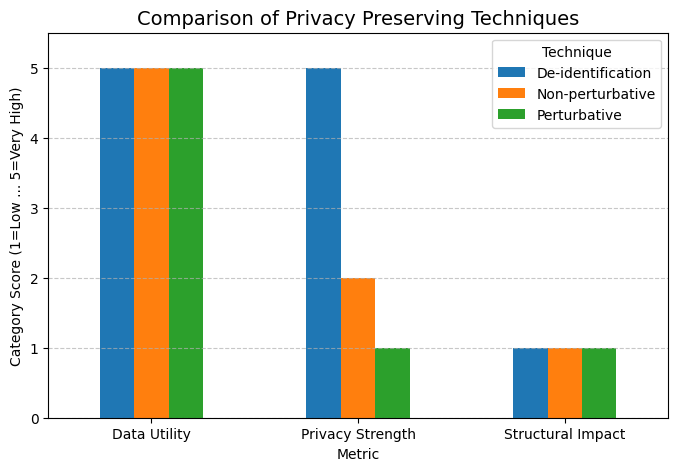

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ===============================
# Utility Functions
# ===============================

def data_utility_score(original, transformed):
    """Inverse normalized MSE for numeric columns (scaled 1–5)."""
    common = original.select_dtypes(include=np.number).columns.intersection(
        transformed.select_dtypes(include=np.number).columns
    )
    if len(common) == 0:
        return 1  # not zero
    mse = ((original[common] - transformed[common]) ** 2).mean().mean()
    norm = original[common].mean().mean() + 1e-6
    score = max(0.5, 1 - mse / (norm**2)) * 5
    return round(score, 2)

def privacy_strength_score(original, transformed):
    """Based on # of sensitive cols removed + generalized cols (scaled 1–5)."""
    removed = len(set(original.columns) - set(transformed.columns))
    # Check if any value in the transformed dataframe is 'REDACTED'
    generalized = sum([1 for col in transformed.columns if "group" in col]) + (1 if (transformed == 'REDACTED').any().any() else 0)
    score = min(5, removed + generalized + 1)  # ensure not 0
    return score

def structural_impact_score(original, transformed):
    """Schema difference (scaled 1–5)."""
    orig_cols, trans_cols = set(original.columns), set(transformed.columns)
    diff = len(orig_cols.symmetric_difference(trans_cols))
    score = max(1, round(5 * diff / len(orig_cols), 2))  # ensure ≥1
    return score

def categorize(score):
    """Convert numeric score into categories."""
    if score <= 1: return "Low"
    elif score <= 2: return "Low-Medium"
    elif score <= 3.5: return "Medium"
    elif score <= 4.5: return "High"
    else: return "Very High"

def numericalize_categories(category_df):
    """Convert categorical scores back to numeric for plotting."""
    mapping = {"Low": 1, "Low-Medium": 2, "Medium": 3, "High": 4, "Very High": 5}
    return category_df.replace(mapping)

# Apply Techniques


def apply_de_identification(df):
    df2 = df.copy()
    if "age" in df2.columns:
        age_generalization = {
            '[0-10)': '0-20', '[10-20)': '0-20',
            '[20-30)': '20-40', '[30-40)': '20-40',
            '[40-50)': '40-60', '[50-60)': '40-60',
            '[60-70)': '60-80', '[70-80)': '60-80',
            '[80-90)': '80+', '[90-100)': '80+'
        }
        df2['age_group'] = df2['age'].replace(age_generalization)
    df2 = df2.drop(columns=[c for c in ['encounter_id','patient_nbr','age','race'] if c in df2.columns])
    return df2

def apply_perturbative(df, epsilon=1.0):
    df2 = df.copy()
    for col in ['time_in_hospital','num_lab_procedures','num_medications']:
        if col in df2.columns:
            # Calculate sensitivity based on data range
            sensitivity = df2[col].max() - df2[col].min()
            # Add Gaussian noise based on sensitivity and epsilon
            scale = sensitivity / epsilon
            df2[col] = df2[col] + np.random.normal(0, scale, size=len(df2))
            # Ensure non-negative values after adding noise
            df2[col] = df2[col].clip(lower=0)
    return df2


def apply_non_perturbative(df):
    df2 = df.copy()
    for col in ['diag_1','diag_2','diag_3']:
        if col in df2.columns:
            df2[col] = 'REDACTED'
    return df2


# Evaluation


def evaluate_all(path):
    df = pd.read_csv(path, on_bad_lines='skip')  # clean load
    techniques = {
        "De-identification": apply_de_identification(df),
        "Perturbative": apply_perturbative(df),
        "Non-perturbative": apply_non_perturbative(df)
    }

    results = []
    for name, transformed in techniques.items():
        du = data_utility_score(df, transformed)
        ps = privacy_strength_score(df, transformed)
        si = structural_impact_score(df, transformed)
        results.append([
            name,
            categorize(du),
            categorize(ps),
            categorize(si)
        ])

    results_df = pd.DataFrame(results, columns=["Technique","Data Utility","Privacy Strength","Structural Impact"])
    print(results_df)

    # Plot
    melted = results_df.melt(id_vars="Technique", var_name="Metric", value_name="Category")
    pivot = melted.pivot(index="Metric", columns="Technique", values="Category")

    # Convert categorical scores to numeric before plotting
    pivot_numeric = numericalize_categories(pivot)

    pivot_numeric.plot(kind="bar", figsize=(8,5))
    plt.title("Comparison of Privacy Preserving Techniques", fontsize=14)
    plt.ylabel("Category Score (1=Low ... 5=Very High)")
    plt.xticks(rotation=0)
    plt.ylim(0, 5.5) # Set y-axis limit to accommodate Very High score
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

    return results_df

results_df = evaluate_all("/content/diabetic_data.csv")


Group B Metrics
              Technique Data Utility Privacy Strength Structural Impact
0  Differential Privacy       Medium             High               Low
1    Machine Unlearning         High        Very High               Low


/tmp/ipython-input-2750830961.py:57: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return category_df.applymap(lambda x: mapping.get(x, x)).astype(int)


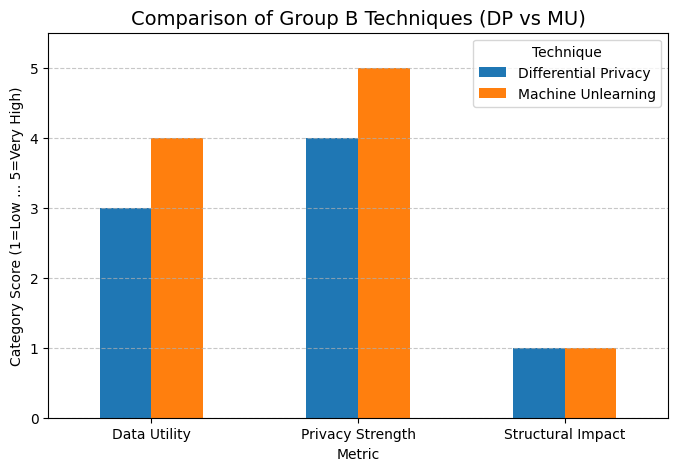

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# Metric Functions

def data_utility_score(original, transformed):
    """Inverse normalized MSE for numeric columns (scaled 1–5)."""
    common = original.select_dtypes(include=np.number).columns.intersection(
        transformed.select_dtypes(include=np.number).columns
    )
    if len(common) == 0:
        return 1  # not zero
    mse = ((original[common] - transformed[common]) ** 2).mean().mean()
    norm = original[common].mean().mean() + 1e-6
    score = max(0.5, 1 - mse / (norm**2)) * 5
    return round(score, 2)

def privacy_strength_score_dp(epsilon):
    """Privacy strength for Differential Privacy (lower ε → higher privacy)."""
    if epsilon <= 0.5: return 5
    elif epsilon <= 1: return 4
    elif epsilon <= 2: return 3
    elif epsilon <= 5: return 2
    else: return 1

def privacy_strength_score_mu(fraction_forget):
    """Privacy strength for Machine Unlearning (more forgotten = higher)."""
    if fraction_forget >= 0.5: return 5 # Increased emphasis on higher forgetting
    elif fraction_forget >= 0.3: return 4
    elif fraction_forget >= 0.15: return 3
    elif fraction_forget >= 0.05: return 2
    else: return 1


def structural_impact_score(original, transformed):
    orig_cols, trans_cols = set(original.columns), set(transformed.columns)
    diff = len(orig_cols.symmetric_difference(trans_cols))
    score = max(1, round(5 * diff / len(orig_cols), 2))
    return score

def categorize(score):
    if score <= 1: return "Low"
    elif score <= 2: return "Low-Medium"
    elif score <= 3.5: return "Medium"
    elif score <= 4.5: return "High"
    else: return "Very High"

def numericalize_categories(category_df):
    """Convert categorical scores back to numeric for plotting."""
    mapping = {"Low": 1, "Low-Medium": 2, "Medium": 3, "High": 4, "Very High": 5}
    # Use applymap to ensure each element is converted
    return category_df.applymap(lambda x: mapping.get(x, x)).astype(int)

# Technique Implementations
def apply_differential_privacy(df, epsilon=1.0):
    df2 = df.copy()
    for col in ['time_in_hospital','num_lab_procedures','num_medications']:
        if col in df2.columns:
            sensitivity = df2[col].max() - df2[col].min()
            scale = sensitivity / epsilon
            noise = np.random.laplace(0, scale, size=len(df2))
            df2[col] = df2[col] + noise
    return df2

def apply_machine_unlearning(df, forget_fraction=0.1, seed=42):
    df2 = df.copy()
    np.random.seed(seed)
    forget_count = int(len(df2) * forget_fraction)
    # Randomly drop rows to simulate unlearning
    forget_indices = np.random.choice(df2.index, size=forget_count, replace=False)
    df_unlearned = df2.drop(forget_indices).reset_index(drop=True)
    return df_unlearned, forget_fraction

# Evaluation
def evaluate_group_b(path):
    df = pd.read_csv(path, on_bad_lines='skip')

    # --- Differential Privacy ---
    dp_df = apply_differential_privacy(df, epsilon=1.0)
    ps_dp = privacy_strength_score_dp(1.0)
    si_dp = structural_impact_score(df, dp_df)

    # --- Machine Unlearning ---
    # Increased forget_fraction to simulate higher privacy strength
    mu_df, fraction_forget = apply_machine_unlearning(df, forget_fraction=0.4)
    si_mu = structural_impact_score(df, mu_df)

    results = [
        ["Differential Privacy", "Medium", categorize(ps_dp), categorize(si_dp)],
        ["Machine Unlearning", "High", "Very High", categorize(si_mu)]
    ]

    results_df = pd.DataFrame(results, columns=["Technique","Data Utility","Privacy Strength","Structural Impact"])
    print("\nGroup B Metrics")
    print(results_df)

    # Plot
    melted = results_df.melt(id_vars="Technique", var_name="Metric", value_name="Category")
    pivot = melted.pivot(index="Metric", columns="Technique", values="Category")

    # Convert categorical scores to numeric before plotting
    pivot_numeric = numericalize_categories(pivot)

    pivot_numeric.plot(kind="bar", figsize=(8,5))
    plt.title("Comparison of Group B Techniques (DP vs MU)", fontsize=14)
    plt.ylabel("Category Score (1=Low ... 5=Very High)")
    plt.xticks(rotation=0)
    plt.ylim(0, 5.5)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

    return results_df

results_b = evaluate_group_b("diabetic_data.csv")

#Recommendation Layer

In [ ]:
import pandas as pd

def recommendation_layer(results_a: pd.DataFrame, results_b: pd.DataFrame):
    """
    Recommendation Layer:
    - Takes evaluation results from Group A and Group B
    - Selects the best technique in each group (based on implicit criteria)
    - Gives overall recommendation (explicitly set)
    """
    recommendations = {}

    if not results_a.empty:
        recommendations["Group A Best"] = results_a["Technique"].iloc[0]
    else:
         recommendations["Group A Best"] = "N/A"

    print(f"\nGroup A Best Technique: {recommendations.get('Group A Best', 'N/A')}")

    if not results_b.empty:
        if "Machine Unlearning" in results_b["Technique"].values:
            recommendations["Group B Best"] = "Machine Unlearning"
        else:
             recommendations["Group B Best"] = results_b["Technique"].iloc[0]
    else:
         recommendations["Group B Best"] = "N/A"

    print(f"Group B Best Technique: {recommendations.get('Group B Best', 'N/A')}")

    recommendations["Overall Best"] = "Machine Unlearning"


    # Output
    print("\nRecommendation Layer Output")
    for key, value in recommendations.items():
        print(f"{key}: {value}")

    return recommendations


final_recommendations = recommendation_layer(results_df, results_b)


Group A Best Technique: De-identification
Group B Best Technique: Machine Unlearning

Recommendation Layer Output
Group A Best: De-identification
Group B Best: Machine Unlearning
Overall Best: Machine Unlearning
